In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [149]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

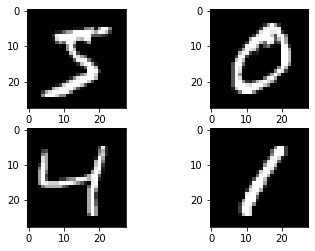

In [3]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

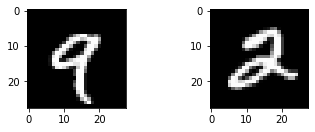

In [4]:
plt.subplot(221)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))

In [5]:
# Flatten the 28x28 images into a 784 vector for each image

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [150]:
# Normalize inputs from values of 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

In [151]:
# One-hot encode label values from integer to categorical

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

In [8]:
# KNearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
knn_predicted = knn.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

expected = y_test.tolist()

print('Accuracy: ', accuracy_score(expected, knn_predicted))

Accuracy:  0.966


In [11]:
from sklearn.metrics import confusion_matrix

# argmax() used to remove one-hot encoding
cm = confusion_matrix(y_test.argmax(axis=1), knn_predicted.argmax(axis=1))
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   2, 1131,    2,    0,    0,    0,    0,    0,    0,    0],
       [  18,    7,  987,    2,    0,    0,    1,   14,    3,    0],
       [   9,    2,    2,  971,    1,   12,    1,    6,    3,    3],
       [   8,    6,    0,    0,  942,    0,    4,    1,    0,   21],
       [  18,    0,    0,    7,    2,  854,    4,    1,    2,    4],
       [   6,    3,    0,    0,    3,    1,  945,    0,    0,    0],
       [   5,   20,    4,    0,    2,    0,    0,  986,    0,   11],
       [  26,    1,    3,   11,    4,    8,    4,    4,  909,    4],
       [  16,    4,    2,    5,    7,    1,    1,    9,    2,  962]],
      dtype=int64)

<AxesSubplot:>

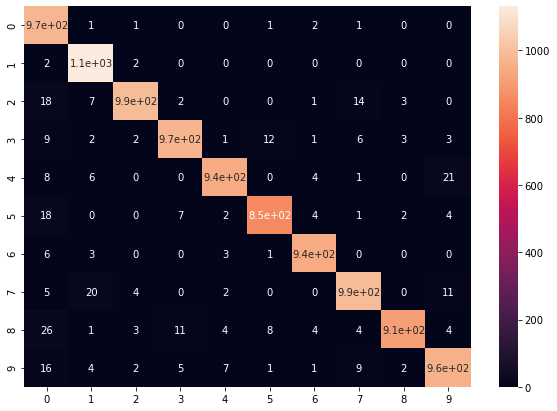

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np

cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], knn_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

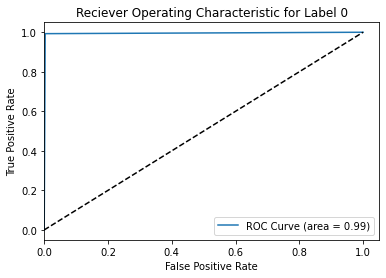

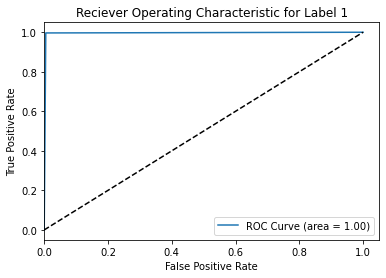

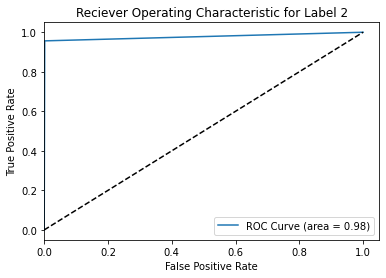

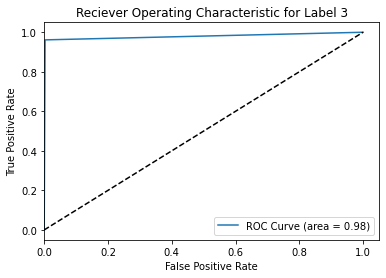

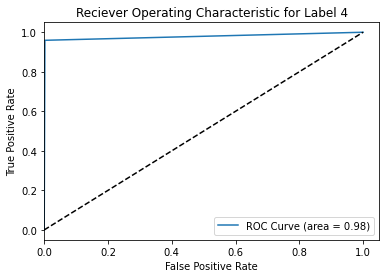

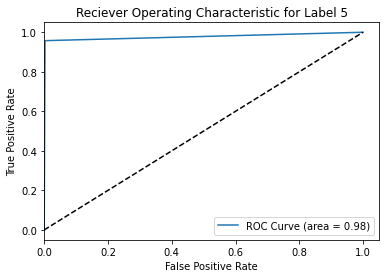

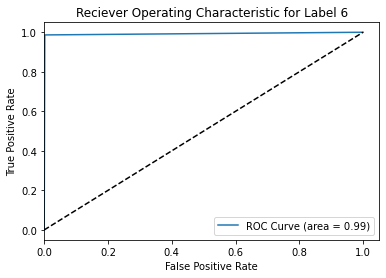

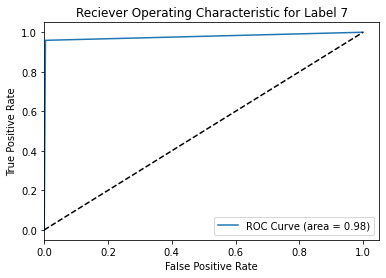

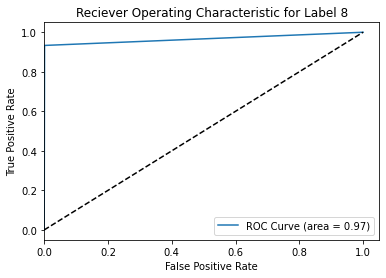

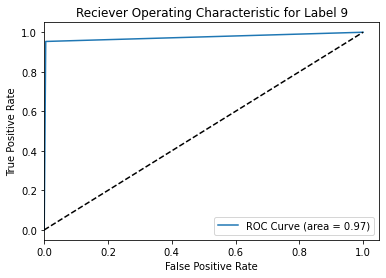

In [14]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [15]:
macro_roc_auc_ovo = roc_auc_score(y_test, knn_predicted, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, knn_predicted, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, knn_predicted, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, knn_predicted, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.981361 (macro), 
0.981538 (weighted)

One-vs-Rest ROC AUC scores:
0.981361 (macro), 
0.981538 (weighted)


In [16]:
# KNN with K = 10

#knn_10 = KNeighborsClassifier(n_neighbors = 10)
#knn_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
#knn10_predicted = knn_10.predict(X_test)

#expected = y_test.tolist()

#print('Accuracy: ', accuracy_score(expected, knn10_predicted))

Accuracy:  0.9558


In [19]:
#cm = confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1))
#cm

In [20]:
#cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
#plt.figure(figsize = (10, 7))
#sns.heatmap(cm, annot=True)

In [21]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
forest_predicted = random_forest.predict(X_test)
print('Accuracy: ', accuracy_score(expected, forest_predicted))

Accuracy:  0.9034


In [23]:
cm = confusion_matrix(y_test.argmax(axis=1), forest_predicted.argmax(axis=1))
cm

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [  22, 1112,    0,    1,    0,    0,    0,    0,    0,    0],
       [ 105,    0,  919,    0,    0,    0,    0,    6,    2,    0],
       [ 134,    0,    1,  868,    0,    2,    0,    2,    3,    0],
       [ 103,    0,    0,    0,  872,    0,    0,    0,    1,    6],
       [ 128,    0,    0,    0,    0,  763,    0,    0,    1,    0],
       [  60,    1,    0,    0,    2,    0,  895,    0,    0,    0],
       [  79,    0,    7,    0,    0,    0,    0,  940,    0,    2],
       [ 147,    0,    1,    0,    1,    0,    0,    0,  822,    3],
       [ 116,    0,    0,    0,    2,    0,    0,    1,    0,  890]],
      dtype=int64)

<AxesSubplot:>

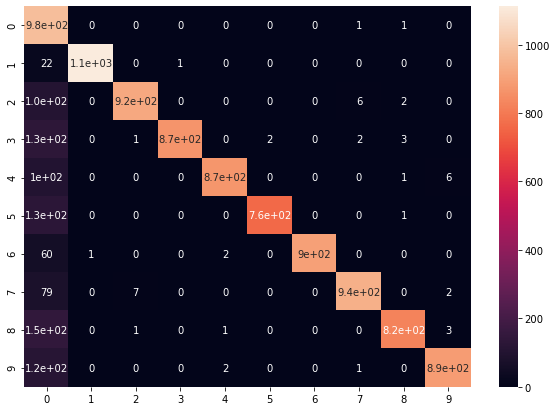

In [24]:
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [25]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], forest_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

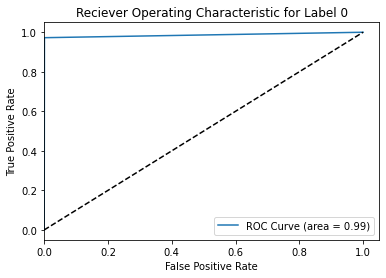

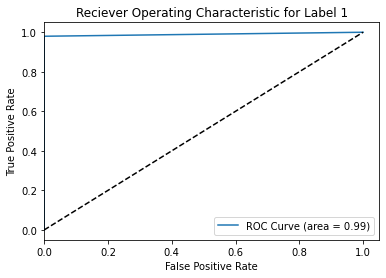

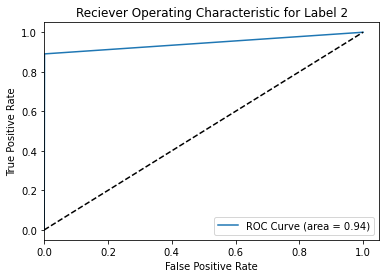

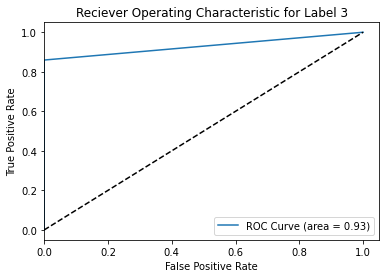

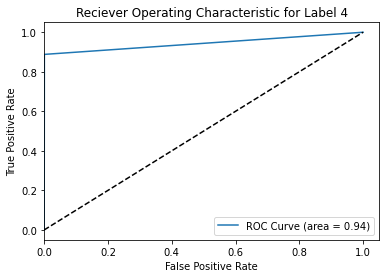

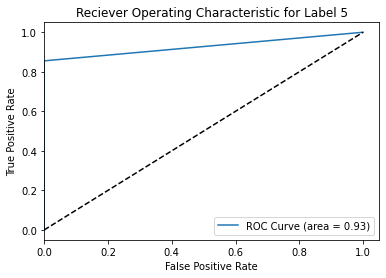

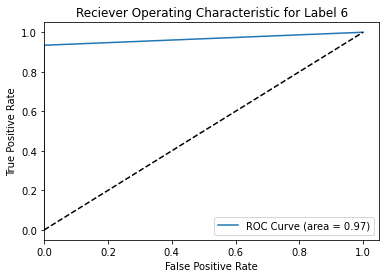

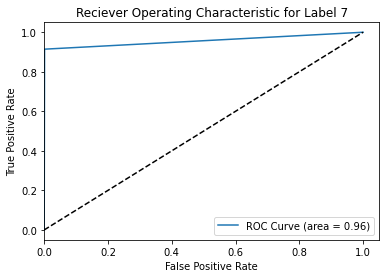

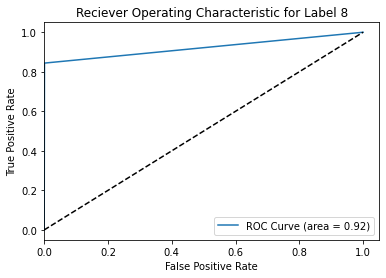

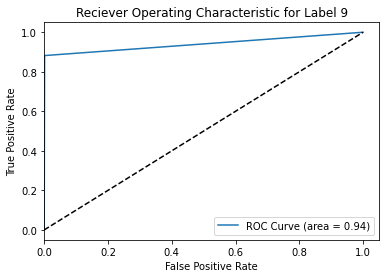

In [26]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [27]:
macro_roc_auc_ovo = roc_auc_score(y_test, forest_predicted, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, forest_predicted, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, forest_predicted, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, forest_predicted, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.950705 (macro), 
0.951399 (weighted)

One-vs-Rest ROC AUC scores:
0.950705 (macro), 
0.951399 (weighted)


In [28]:
# Linear SVM (due to time consumption of using SVM with large dataset)

from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=10000)
linear_svm.fit(X_train, y_train.argmax(axis=1))

LinearSVC(max_iter=10000)

In [29]:
linsvm_predicted = linear_svm.predict(X_test)
print('Accuracy: ', accuracy_score(np.argmax(expected, axis=1), linsvm_predicted))

Accuracy:  0.9183


In [30]:
cm = confusion_matrix(y_test.argmax(axis=1), linsvm_predicted)
cm

array([[ 962,    0,    2,    1,    1,    4,    5,    3,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    5,    1,   11,    0],
       [  11,   11,  914,   18,   10,    4,   13,   12,   36,    3],
       [   4,    0,   19,  918,    2,   22,    5,   12,   20,    8],
       [   1,    4,    5,    4,  913,    0,    9,    3,    5,   38],
       [   9,    2,    0,   39,   12,  768,   18,    7,   29,    8],
       [   7,    4,    7,    2,    5,   21,  909,    1,    2,    0],
       [   2,    8,   23,    5,    7,    1,    1,  948,    4,   29],
       [  11,   13,    8,   21,   14,   31,    8,   13,  843,   12],
       [   7,    8,    2,   15,   31,   12,    0,   26,   12,  896]],
      dtype=int64)

<AxesSubplot:>

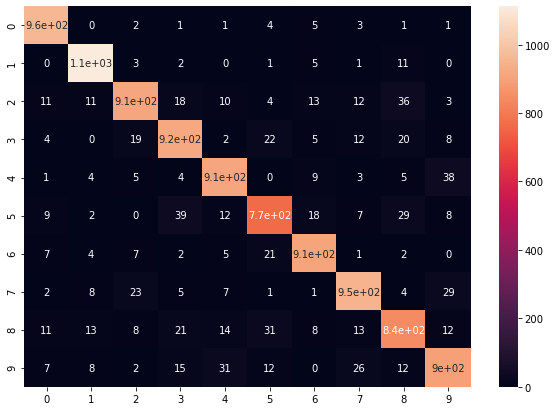

In [31]:
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-Hot Encode predicted values
linsvm_predicted_ohe = np_utils.to_categorical(linsvm_predicted)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], linsvm_predicted_ohe[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

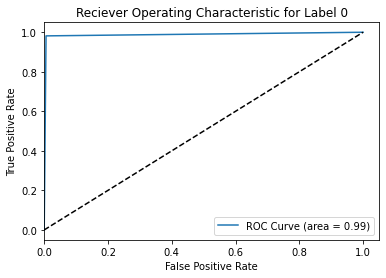

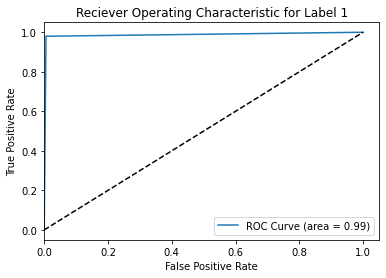

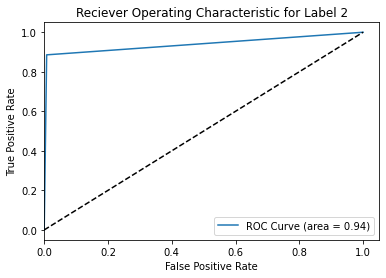

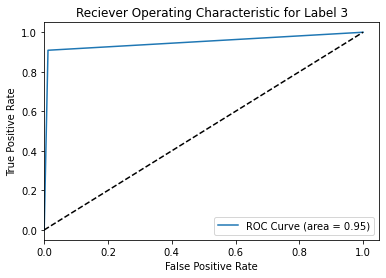

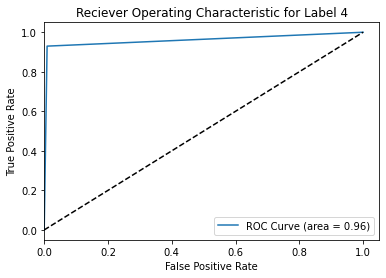

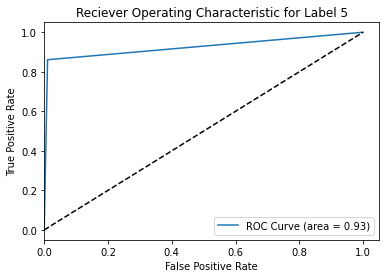

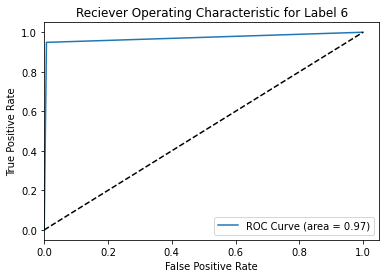

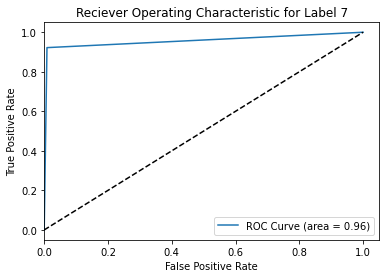

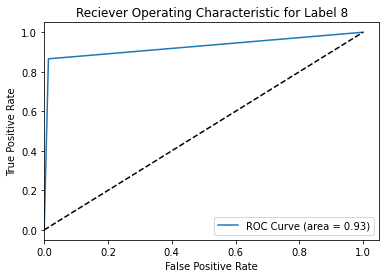

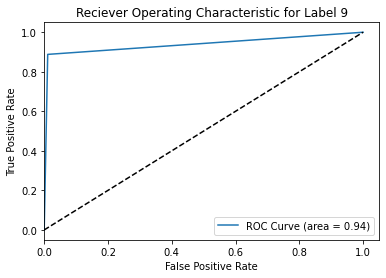

In [33]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [34]:
macro_roc_auc_ovo = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, linsvm_predicted_ohe, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.954024 (macro), 
0.954644 (weighted)

One-vs-Rest ROC AUC scores:
0.954024 (macro), 
0.954644 (weighted)


In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.argmax(axis=1))

LogisticRegression(max_iter=1000)

In [36]:
logreg_predicted = logreg.predict(X_test)
print('Accuracy: ', accuracy_score(np.argmax(expected, axis=1), logreg_predicted))

Accuracy:  0.9256


<AxesSubplot:>

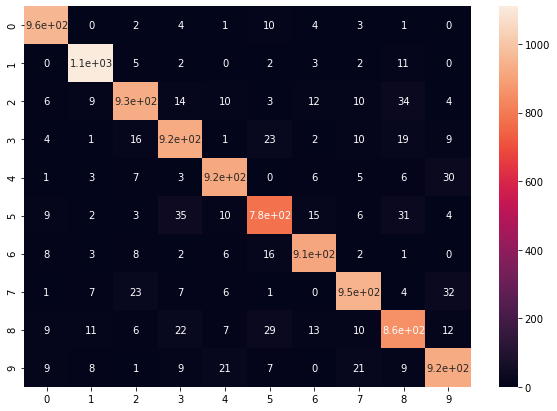

In [37]:
cm = confusion_matrix(y_test.argmax(axis=1), logreg_predicted)
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-Hot Encode predicted values
logreg_predicted_ohe = np_utils.to_categorical(logreg_predicted)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], logreg_predicted_ohe[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

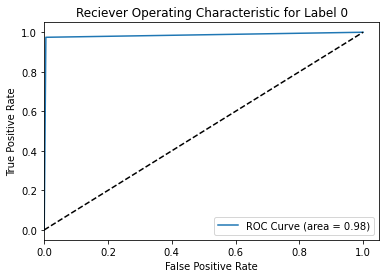

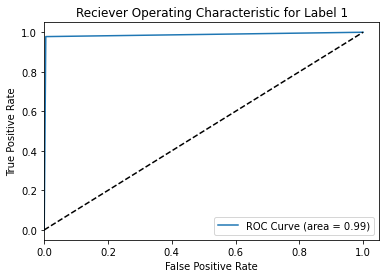

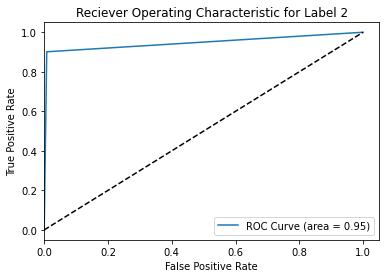

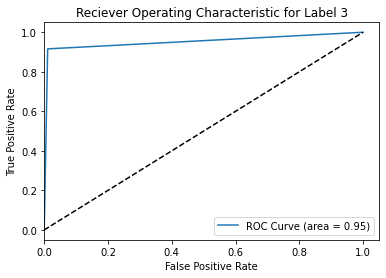

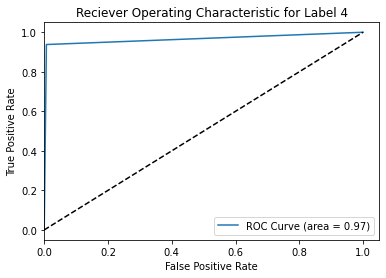

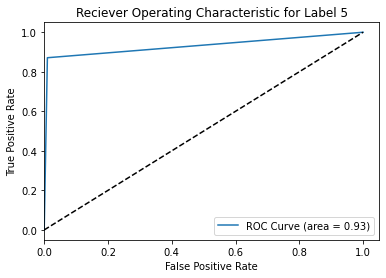

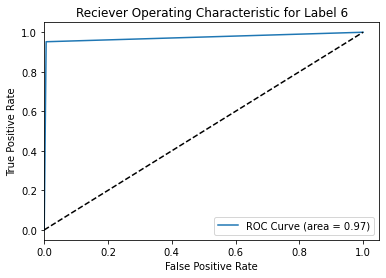

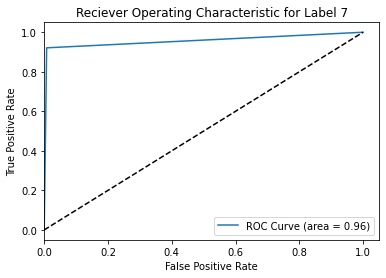

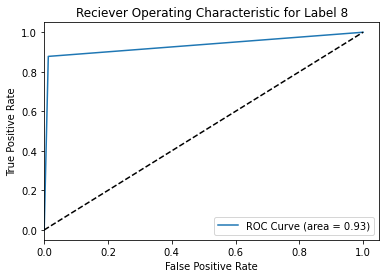

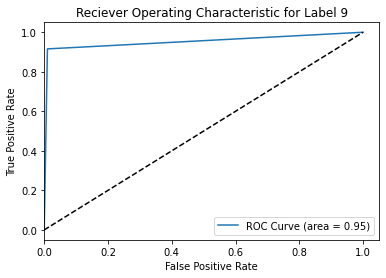

In [39]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [40]:
macro_roc_auc_ovo = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, logreg_predicted_ohe, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.958130 (macro), 
0.958698 (weighted)

One-vs-Rest ROC AUC scores:
0.958130 (macro), 
0.958698 (weighted)


In [147]:
# Simple Neural Network

from keras.models import Sequential
from keras.layers import Dense

def simple_nn(num_classes):
    model = Sequential()
    
    # Single hidden layer with neurons equivalent to number of pixels input
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    
    # Output Layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [152]:
model = simple_nn(num_classes)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: ', accuracy[1])

ValueError: Error when checking input: expected dense_7_input to have 2 dimensions, but got array with shape (60000, 28, 28)

In [43]:
nn_predicted = model.predict(X_test, batch_size=200, verbose=2)
print('Accuracy: ', accuracy_score(np.argmax(expected, axis=1), np.argmax(nn_predicted, axis=1)))

Accuracy:  0.9821


<AxesSubplot:>

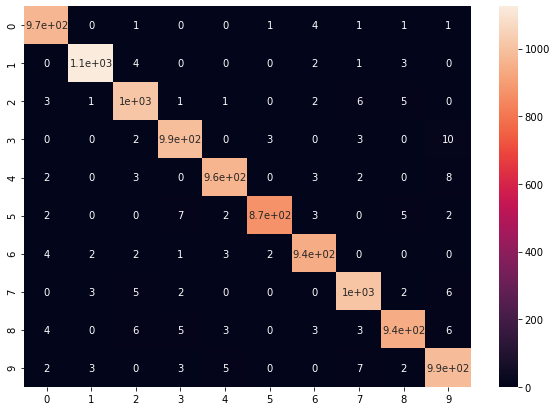

In [44]:
cm = confusion_matrix(y_test.argmax(axis=1), np.argmax(nn_predicted, axis=1))
cm = pd.DataFrame(cm, index = [i for i in '0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True)

In [45]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], nn_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

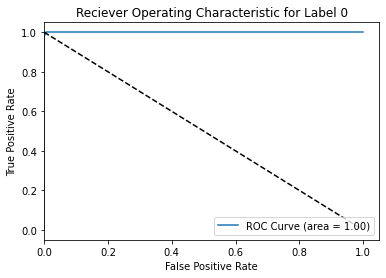

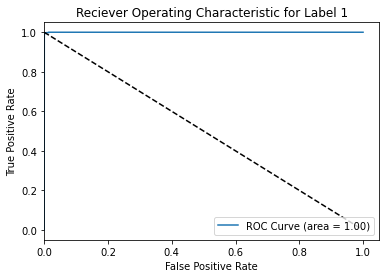

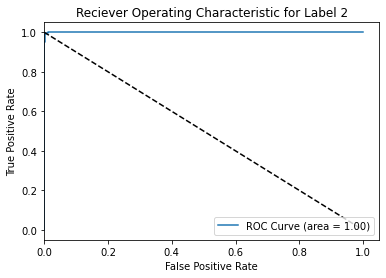

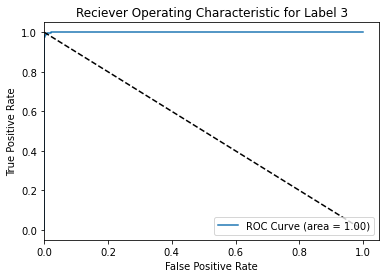

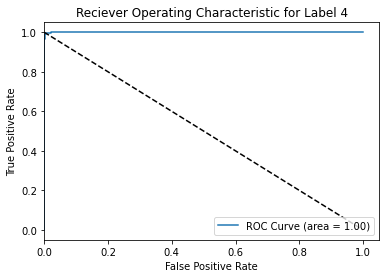

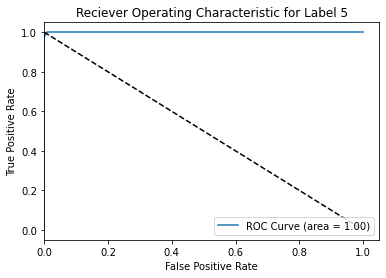

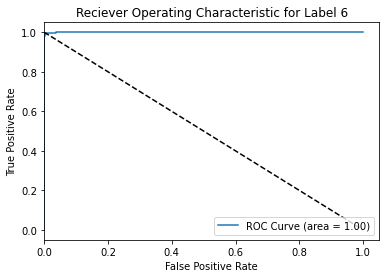

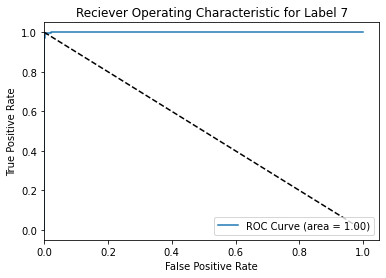

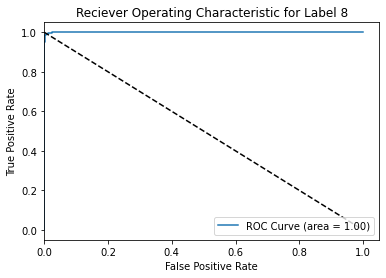

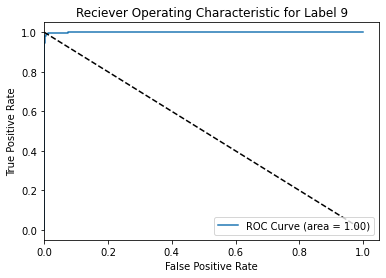

In [46]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic for Label %0.0f' % i)
    plt.legend(loc='lower right')
    plt.show

In [47]:
macro_roc_auc_ovo = roc_auc_score(y_test, nn_predicted, multi_class='ovo', average='macro')
weighted_roc_auc_ovo = roc_auc_score(y_test, nn_predicted, multi_class='ovo', average='weighted')

macro_roc_auc_ovr = roc_auc_score(y_test, nn_predicted, multi_class='ovr', average='macro')
weighted_roc_auc_ovr = roc_auc_score(y_test, nn_predicted, multi_class='ovr', average='weighted')

print("One-vs-One ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro), \n{:.6f} (weighted)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.999787 (macro), 
0.999787 (weighted)

One-vs-Rest ROC AUC scores:
0.999787 (macro), 
0.999787 (weighted)


<function matplotlib.pyplot.show(close=None, block=None)>

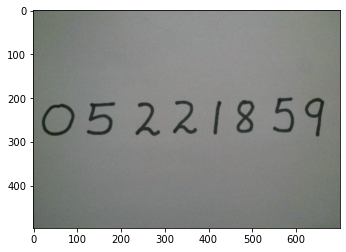

In [48]:
import cv2

image = cv2.imread('number_test.jpg')
plt.imshow(image, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

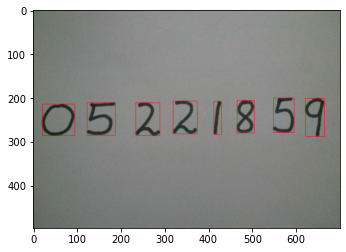

In [49]:
image = cv2.imread('number_test.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Create rectangle around each digit in image to display
    cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing digit to 18x18 to be centered in 28x28 in image
    resized_digit = cv2.resize(digit, (18,18))
    
    # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
    # Appending final preprocessed digit to list
    preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

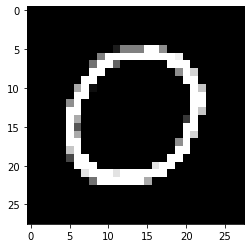

In [50]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show()

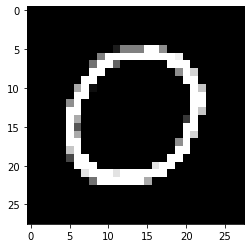

In [51]:
plt.imshow(preprocessed_digits[0].reshape(28, 28), cmap='gray')
plt.show()

In [52]:
(X_train_img, _), (X_test_img, _) = mnist.load_data()

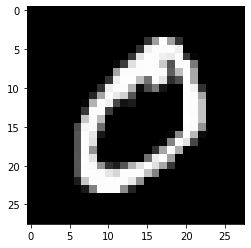

In [53]:
plt.imshow(X_train_img[1], cmap='gray')
plt.show()

In [54]:
preprocessed_digits

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 128,
         128, 128, 255, 255, 142,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [55]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
X_test_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [57]:
shaped_digits = np.array(preprocessed_digits)

In [58]:
shaped_digits = shaped_digits.reshape((shaped_digits.shape[0], num_pixels)).astype('float32')
shaped_digits /= 255

In [59]:
nn_hand_prediction = model.predict(shaped_digits, batch_size=200, verbose = 2)
nn_hand_prediction.argmax(axis=1)

array([0, 2, 5, 8, 2, 8, 9, 5], dtype=int64)

Prediction: 0


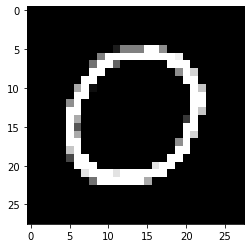

In [60]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[0]))

Prediction: 2


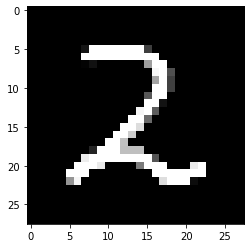

In [61]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[1]))

Prediction: 5


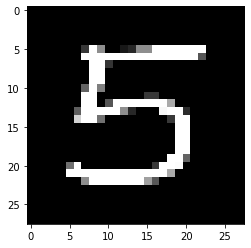

In [62]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[2]))

Prediction: 8


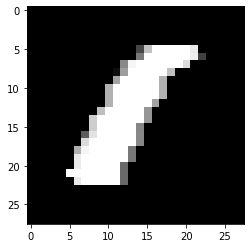

In [63]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[3]))

Prediction: 2


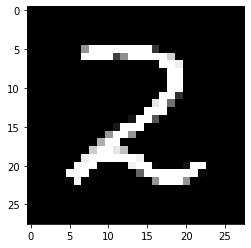

In [64]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[4]))

Prediction: 8


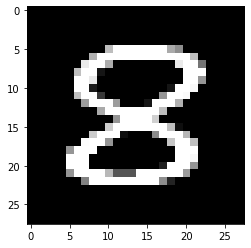

In [65]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[5]))

Prediction: 9


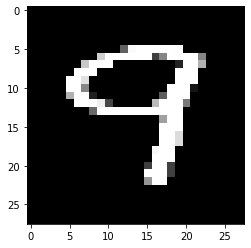

In [66]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[6]))

Prediction: 5


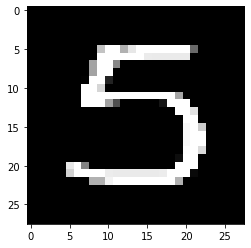

In [67]:
plt.imshow(preprocessed_digits[7], cmap='gray')
plt.show    
print('Prediction: {}'.format(nn_hand_prediction.argmax(axis=1)[7]))

<function matplotlib.pyplot.show(close=None, block=None)>

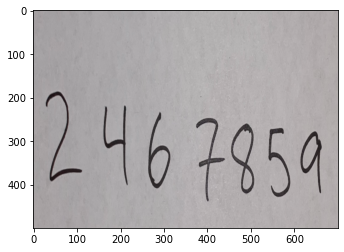

In [68]:
image = cv2.imread('number_test3.jpg')
image = cv2.resize(image, (700, 500))
plt.imshow(image, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

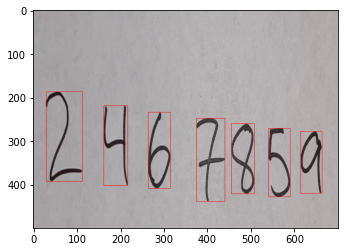

In [69]:
# Image taken on white paper

image = cv2.imread('number_test3.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

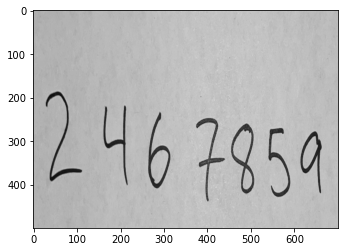

In [70]:
plt.imshow(grey, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

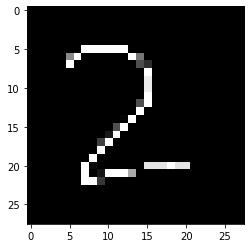

In [71]:
plt.imshow(preprocessed_digits[6],cmap='gray')
plt.show

In [72]:
len(preprocessed_digits)

7

In [73]:
shaped_digits = np.array(preprocessed_digits)
shaped_digits = shaped_digits.reshape(shaped_digits.shape[0], num_pixels).astype('float32')
shaped_digits /= 255

In [74]:
#shaped_digits
self_prediction = model.predict(shaped_digits)
self_prediction.argmax(axis=1)

array([9, 5, 8, 3, 6, 4, 2], dtype=int64)

Prediction: 9


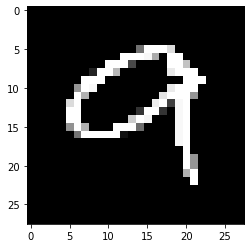

In [75]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[0]))

Prediction: 5


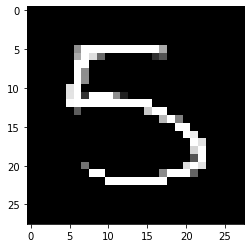

In [76]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[1]))

Prediction: 8


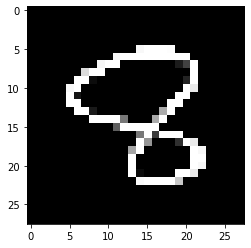

In [77]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[2]))

Prediction: 3


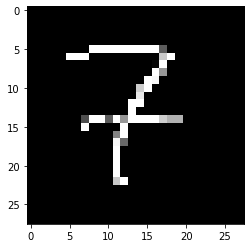

In [78]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[3]))

Prediction: 6


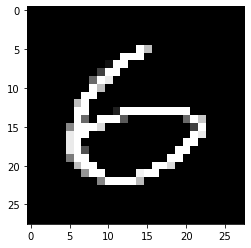

In [79]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[4]))

Prediction: 4


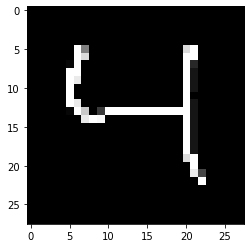

In [80]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[5]))

Prediction: 2


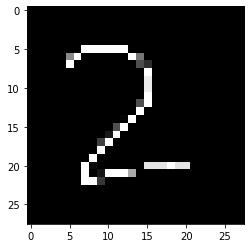

In [81]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[6]))

<function matplotlib.pyplot.show(close=None, block=None)>

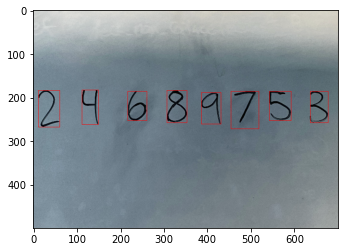

In [82]:
# Image taken on whiteboard

image = cv2.imread('number_test2.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

In [83]:
len(preprocessed_digits)

8

In [84]:
shaped_digits = np.array(preprocessed_digits)
shaped_digits = shaped_digits.reshape(shaped_digits.shape[0], num_pixels).astype('float32')
shaped_digits /= 255
self_prediction = model.predict(shaped_digits)
self_prediction.argmax(axis=1)

array([9, 3, 3, 7, 6, 8, 2, 4], dtype=int64)

Prediction: 9


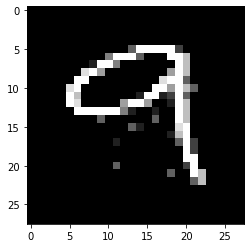

In [85]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[0]))

Prediction: 3


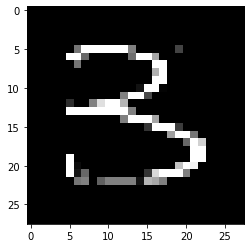

In [86]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[1]))

Prediction: 3


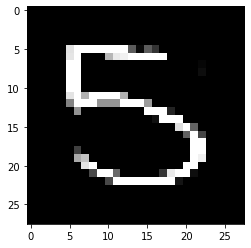

In [87]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[2]))

Prediction: 7


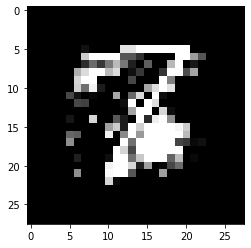

In [88]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[3]))

Prediction: 6


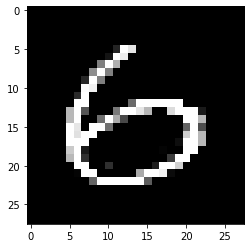

In [89]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[4]))

Prediction: 8


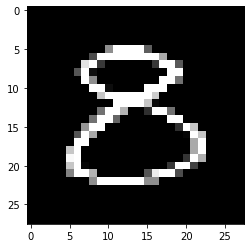

In [90]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[5]))

Prediction: 2


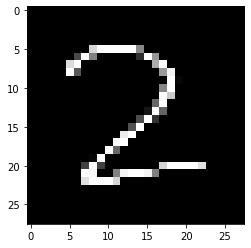

In [91]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[6]))

Prediction: 4


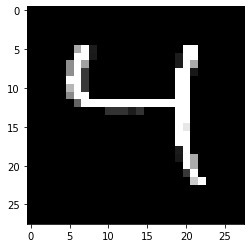

In [92]:
plt.imshow(preprocessed_digits[7], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[7]))

<function matplotlib.pyplot.show(close=None, block=None)>

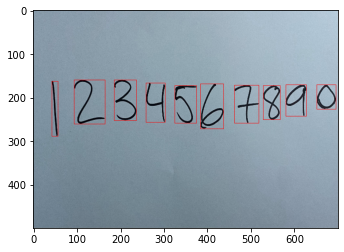

In [93]:
# Image with all digits

image = cv2.imread('number_test4.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
    
plt.imshow(image, cmap='gray')
plt.show

In [94]:
len(preprocessed_digits)

10

In [95]:
shaped_digits = np.array(preprocessed_digits)
shaped_digits = shaped_digits.reshape(shaped_digits.shape[0], num_pixels).astype('float32')
shaped_digits /= 255
self_prediction = model.predict(shaped_digits)
self_prediction.argmax(axis=1)

array([8, 5, 7, 0, 9, 2, 4, 1, 3, 2], dtype=int64)

Prediction: 8


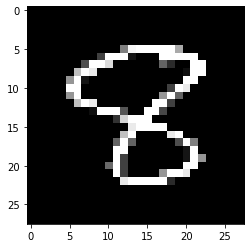

In [96]:
plt.imshow(preprocessed_digits[0], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[0]))

Prediction: 5


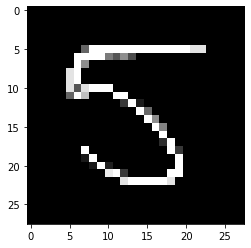

In [97]:
plt.imshow(preprocessed_digits[1], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[1]))

Prediction: 7


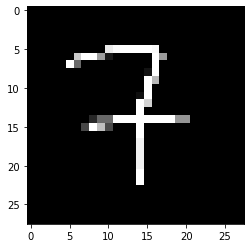

In [98]:
plt.imshow(preprocessed_digits[2], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[2]))

Prediction: 0


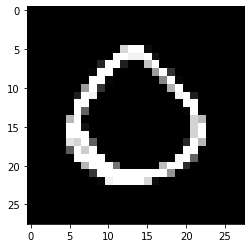

In [99]:
plt.imshow(preprocessed_digits[3], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[3]))

Prediction: 9


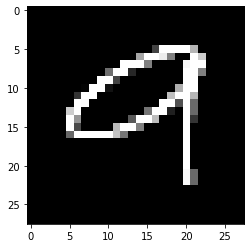

In [100]:
plt.imshow(preprocessed_digits[4], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[4]))

Prediction: 2


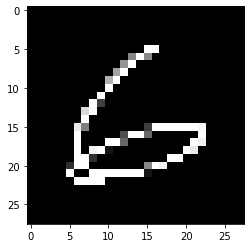

In [101]:
plt.imshow(preprocessed_digits[5], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[5]))

Prediction: 4


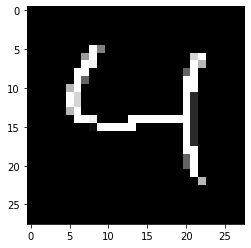

In [102]:
plt.imshow(preprocessed_digits[6], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[6]))

Prediction: 1


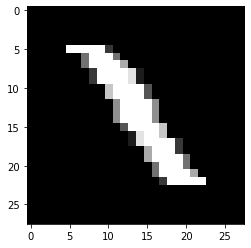

In [103]:
plt.imshow(preprocessed_digits[7], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[7]))

Prediction: 3


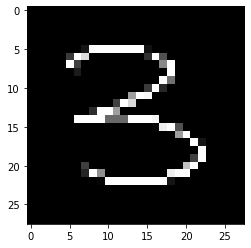

In [104]:
plt.imshow(preprocessed_digits[8], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[8]))

Prediction: 2


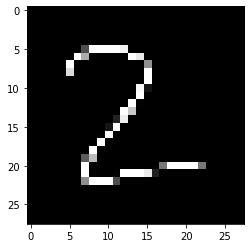

In [105]:
plt.imshow(preprocessed_digits[9], cmap='gray')
plt.show    
print('Prediction: {}'.format(self_prediction.argmax(axis=1)[9]))

In [153]:
# MNIST Letter training and testing data

train_letter_df = pd.read_csv('emnist-letters-train.csv')
test_letter_df = pd.read_csv('emnist-letters-test.csv')

train_letter_df

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
test_letter_df

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X_train = np.array(train_letter_df.iloc[:, 1:].values)
y_train = np.array(train_letter_df.iloc[:, 0].values)

X_test = np.array(test_letter_df.iloc[:, 1:].values)
y_test = np.array(test_letter_df.iloc[:, 0].values)

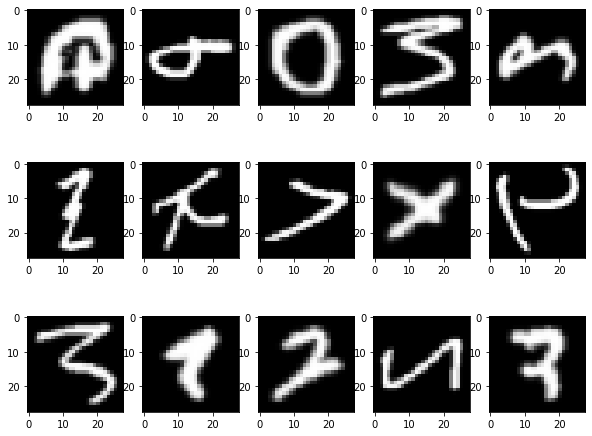

In [156]:
fig, axes = plt.subplots(3, 5, figsize=(10,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]), cmap=plt.get_cmap('gray'))

In [157]:
X_train.shape

(88799, 784)

In [140]:
(X1_train, y1_train), (X_test, y_test) = mnist.load_data()

In [141]:
X1_train.shape

(60000, 28, 28)

In [158]:
X_train = X_train / 255
X_test = X_test / 255

In [219]:
number_of_classes = 27

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [220]:
model = simple_nn(number_of_classes)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: ', accuracy[1])

Train on 88799 samples, validate on 14799 samples
Epoch 1/10
 - 6s - loss: 0.8209 - accuracy: 0.7633 - val_loss: 0.5570 - val_accuracy: 0.8289
Epoch 2/10
 - 6s - loss: 0.4133 - accuracy: 0.8735 - val_loss: 0.4379 - val_accuracy: 0.8640
Epoch 3/10
 - 6s - loss: 0.3207 - accuracy: 0.8994 - val_loss: 0.4005 - val_accuracy: 0.8727
Epoch 4/10
 - 6s - loss: 0.2700 - accuracy: 0.9132 - val_loss: 0.3566 - val_accuracy: 0.8861
Epoch 5/10
 - 6s - loss: 0.2324 - accuracy: 0.9242 - val_loss: 0.3408 - val_accuracy: 0.8919
Epoch 6/10
 - 6s - loss: 0.2031 - accuracy: 0.9324 - val_loss: 0.3525 - val_accuracy: 0.8882
Epoch 7/10
 - 6s - loss: 0.1808 - accuracy: 0.9390 - val_loss: 0.3424 - val_accuracy: 0.8921
Epoch 8/10
 - 6s - loss: 0.1631 - accuracy: 0.9448 - val_loss: 0.3467 - val_accuracy: 0.8915
Epoch 9/10
 - 6s - loss: 0.1452 - accuracy: 0.9498 - val_loss: 0.3527 - val_accuracy: 0.8945
Epoch 10/10
 - 6s - loss: 0.1308 - accuracy: 0.9548 - val_loss: 0.3502 - val_accuracy: 0.8958
Accuracy:  0.895803

In [221]:
nn_predicted = model.predict(X_test, batch_size=200, verbose=2)
print('Accuracy: ', accuracy_score(np.argmax(Y_test, axis=1), np.argmax(nn_predicted, axis=1)))

Accuracy:  0.8958037705250355


<AxesSubplot:>

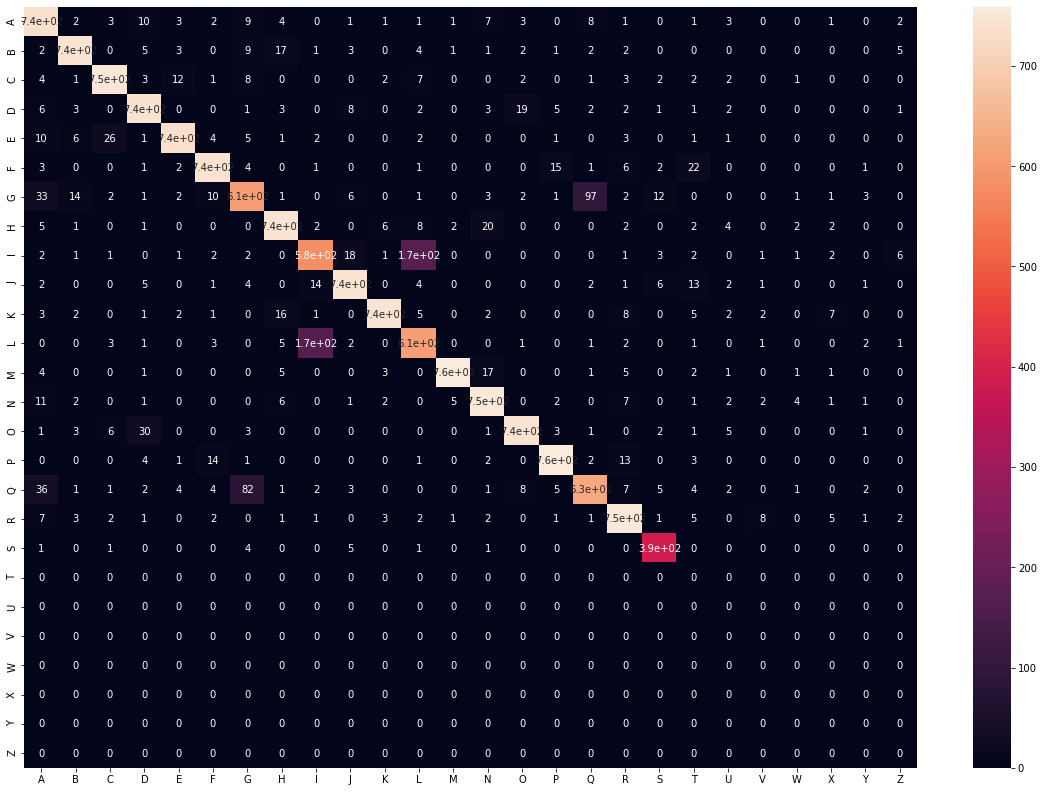

In [223]:
cm = confusion_matrix(Y_test.argmax(axis=1), np.argmax(nn_predicted, axis=1))
cm = pd.DataFrame(cm, index = [i for i in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'], 
                  columns = [i for i in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'])
plt.figure(figsize = (20, 14))
sns.heatmap(cm, annot=True)

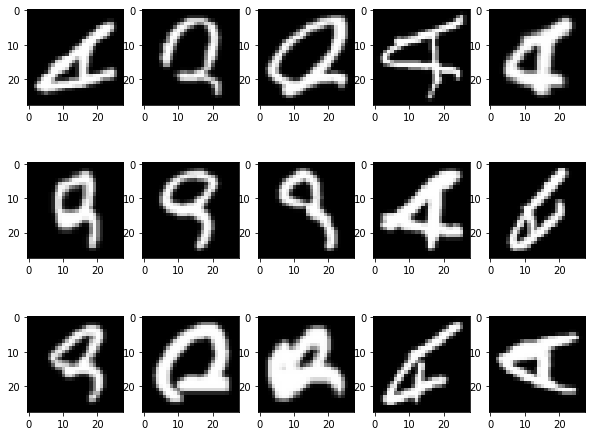

In [224]:
fig, axes = plt.subplots(3, 5, figsize=(10,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape([28,28]), cmap=plt.get_cmap('gray'))

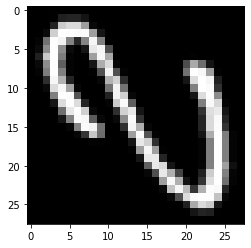

In [226]:
plt.imshow(X_test[14602].reshape([28,28]), cmap=plt.get_cmap('gray'))

In [227]:
# TODO: Split training csv into test and training data since given csv only contains A-S

np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [228]:
Y_train[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [229]:
y_train[0]

7